# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [17]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the dataset.
data = pd.read_csv('ML_Datasets/ionosphere_data.csv', delimiter=',')

In [19]:
data.shape

(351, 35)

In [20]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


#### Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.

In [21]:
data.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [22]:
data.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
       'feature32', 'feature33', 'feature34', 'label'],
      dtype='object')

In [23]:
data.label.unique()

array(['g', 'b'], dtype=object)

#### Encode labels.

In [24]:
from sklearn.preprocessing import LabelEncoder
lblencoder = LabelEncoder()

data['label'] = lblencoder.fit_transform(data['label'])

In [25]:
corr_data = data.corr()
#print(corr_data)

data_features = corr_data.index
#print(data[data_features].corr())
plt.figure(figsize= (28,28))
##sns.heatmap(data[data_features].corr(),annot=True,cmap="YlGnBu")

<Figure size 2016x2016 with 0 Axes>

<Figure size 2016x2016 with 0 Axes>

In [26]:
Valueable_cols = ['feature1', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature18', 'feature19', 'feature21',
        'feature23', 'feature25',  'feature29', 'feature31',
                  'feature33', 'label']
Valueable_data = data[Valueable_cols]
Valueable_data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature16,feature18,feature19,feature21,feature23,feature25,feature29,feature31,feature33,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.38223,-0.38542,0.58212,0.56971,0.36946,0.56811,0.21266,0.42267,0.18641,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.97515,-0.62237,0.33109,-0.13151,-0.18056,-0.20332,-0.19040,-0.16626,-0.13738,0
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,0.00299,-0.13644,0.75535,0.70887,0.43385,0.57528,0.43100,0.60436,0.56045,1
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.14516,-0.39330,-1.00000,-0.69975,0.00000,1.00000,1.00000,0.25682,-0.32382,0
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.27457,-0.21780,0.45107,0.05982,0.02309,0.03286,0.02431,-0.05707,-0.04608,1


#### Shuffle the data if needed.

#### Split into 60 and 40 ratio.

In [27]:
x = (Valueable_data.loc[:,Valueable_data.columns !='label'])
y = (Valueable_data.loc[:,Valueable_data.columns =='label'])
#print(x)
#print(y)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=0.40,random_state=100)

#### Standardized the Input Variables. Hint: Centeralized the data

In [28]:
#Normalize
mean = xtrain.mean(axis=0)
xtrain -= mean
std = xtrain.std(axis=0)
xtrain /= std
xtest -= mean
xtest /= std

#### Model : 1 hidden layers including 16 unit.

In [29]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

In [30]:
#model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])

#### Train the Model with Epochs (100).

In [32]:
#x_val = xtrain[:25]
#partial_x_train = xtrain[25:]

#y_val = ytrain[:25]
#partial_y_train = ytrain[25:]

In [33]:
history = model.fit(xtrain,ytrain,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.10,
                    
                   )
#validation_data=(x_val, y_val)

Epoch 1/100
2/2 [==============================] - 5s 2s/step - loss: 0.7136 - accuracy: 0.6017 - val_loss: 0.6550 - val_accuracy: 0.7143
Epoch 2/100
2/2 [==============================] - 0s 208ms/step - loss: 0.6660 - accuracy: 0.6790 - val_loss: 0.6377 - val_accuracy: 0.7143
Epoch 3/100
2/2 [==============================] - 0s 201ms/step - loss: 0.6341 - accuracy: 0.6931 - val_loss: 0.6237 - val_accuracy: 0.6667
Epoch 4/100
2/2 [==============================] - 0s 171ms/step - loss: 0.6120 - accuracy: 0.7334 - val_loss: 0.6099 - val_accuracy: 0.6667
Epoch 5/100
2/2 [==============================] - 0s 166ms/step - loss: 0.5758 - accuracy: 0.7884 - val_loss: 0.5979 - val_accuracy: 0.6190
Epoch 6/100
2/2 [==============================] - 0s 227ms/step - loss: 0.5694 - accuracy: 0.7589 - val_loss: 0.5881 - val_accuracy: 0.6190
Epoch 7/100
2/2 [==============================] - 0s 187ms/step - loss: 0.5415 - accuracy: 0.7858 - val_loss: 0.5784 - val_accuracy: 0.6190
Epoch 8/100
2/2 

2/2 [==============================] - 0s 120ms/step - loss: 0.1920 - accuracy: 0.9324 - val_loss: 0.3593 - val_accuracy: 0.7143
Epoch 59/100
2/2 [==============================] - 0s 108ms/step - loss: 0.1910 - accuracy: 0.9298 - val_loss: 0.3551 - val_accuracy: 0.7143
Epoch 60/100
2/2 [==============================] - 0s 128ms/step - loss: 0.1968 - accuracy: 0.9132 - val_loss: 0.3541 - val_accuracy: 0.7143
Epoch 61/100
2/2 [==============================] - 0s 140ms/step - loss: 0.1889 - accuracy: 0.9263 - val_loss: 0.3509 - val_accuracy: 0.7143
Epoch 62/100
2/2 [==============================] - 0s 175ms/step - loss: 0.1825 - accuracy: 0.9272 - val_loss: 0.3484 - val_accuracy: 0.7143
Epoch 63/100
2/2 [==============================] - 0s 220ms/step - loss: 0.1938 - accuracy: 0.9220 - val_loss: 0.3473 - val_accuracy: 0.7143
Epoch 64/100
2/2 [==============================] - 0s 151ms/step - loss: 0.1755 - accuracy: 0.9272 - val_loss: 0.3457 - val_accuracy: 0.7143
Epoch 65/100
2/2 [=

#### If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

In [34]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

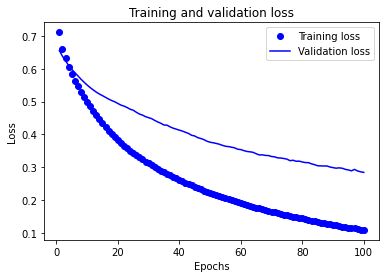

In [35]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

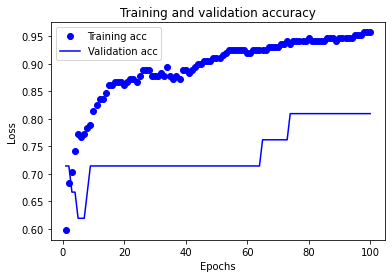

In [36]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Evaluation Step

In [37]:
score = model.evaluate(xtest, ytest)

5/5 [==============================] - 0s 5ms/step - loss: 0.1906 - accuracy: 0.9149


#### Prediction should be > 92%

#### Prediction

In [38]:
model.predict(xtest)

array([[9.82062101e-01],
       [9.78756905e-01],
       [8.45223367e-02],
       [9.93706584e-01],
       [8.66800547e-04],
       [2.37139411e-05],
       [2.29736209e-01],
       [9.14070964e-01],
       [9.93474245e-01],
       [9.29136872e-02],
       [2.94927657e-01],
       [9.58636820e-01],
       [9.68276381e-01],
       [3.81258070e-01],
       [8.37556124e-01],
       [9.96877670e-01],
       [9.96066928e-01],
       [9.66396928e-01],
       [7.37924576e-01],
       [3.90096605e-02],
       [9.38193679e-01],
       [9.74735618e-03],
       [8.50261748e-02],
       [9.65862036e-01],
       [9.84456897e-01],
       [9.97618914e-01],
       [1.05527341e-02],
       [9.55484748e-01],
       [9.15046811e-01],
       [9.99521613e-01],
       [9.80870426e-01],
       [9.98024106e-01],
       [9.86829162e-01],
       [4.77384329e-02],
       [9.96195793e-01],
       [9.90607738e-01],
       [2.18892813e-01],
       [9.88701820e-01],
       [1.08355132e-04],
       [6.77397370e-01],


In [39]:
predictions=model.predict(xtest)
print('predictions = ',predictions.max())
y_test_pred = np.argmax(predictions,axis = 1)

predictions =  0.9995296


In [ ]:
np.array(ytest)[0]

In [ ]:
#predictions

In [ ]:
#for i in range(50):
 #   print("actual",np.array(ytest)[i],"predicted",y_test_pred[i])